**Question 1: -**
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

**Note -** You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

**Example input - string =** “write write write all the number from from from 1 to 100”

**Example output -** 5

**Explanation -** From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def wordCountLength(inputStr):
    # Removing punctuation and converting to lowercase
    inputStr = inputStr.lower()
    inputStr = inputStr.replace(',', '').replace('.', '')

    # Splitting the string into words
    words = inputStr.split()

    # Counting the frequency of each word
    wordFreq = {}
    for word in words:
        wordFreq[word] = wordFreq.get(word, 0) + 1

    # Finding the highest frequency
    maxFreq = max(wordFreq.values())

    # Finding the length of the highest-frequency word
    highestFreqWordLen = max(len(word) for word, frequency in wordFreq.items() if frequency == maxFreq)

    return highestFreqWordLen

inputStr = "write write write all the number from from from 1 to 100"
res = wordCountLength(inputStr)
print(res)

5


**Question 2: -**
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

**Note -** You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

**Example input 1 - s =** “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

**Example output 1-** YES

**Example input 2 - s** “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

**Example output 2 -** NO

In [2]:
from collections import Counter

def isValidString(inputStr):
    charFreq = Counter(inputStr)
    freqCount = Counter(charFreq.values())

    # Case 1: All characters appear same number of times
    if len(freqCount) == 1:
        return "YES"

    # Case 2: All characters except one appear same number of times
    elif len(freqCount) == 2:
        maxFreq, minFreq = max(freqCount), min(freq_count)
        if freqCount[maxFreq] == 1 and (maxFreq - minFreq == 1 or minFreq == 1):
            return "YES"

    # Rest of the cases
    return "NO"

inputStr = "abbccc"
result = isValidString(inputStr)
print(result)

NO


**Question 3: -**
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

**Note -** Write comments wherever necessary explaining the code written.

**Link -** https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

**Data Attributes - id: Identification Number - int num:** Number of the

● Pokémon in the official Pokédex - int name: Pokémon name -

● string img: URL to an image of this Pokémon - string type:

● Pokémon type -string height: Pokémon height - float

● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given

● when transferred - string candy_count: the amount of candies required to evolve
- int

● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:

● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int

● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of

● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [3]:
import pandas as pd
import numpy as np
import json
import requests

In [4]:
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

response = requests.get(url)
data = json.loads(response.text)
data

{'pokemon': [{'id': 1,
   'num': '001',
   'name': 'Bulbasaur',
   'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
   'type': ['Grass', 'Poison'],
   'height': '0.71 m',
   'weight': '6.9 kg',
   'candy': 'Bulbasaur Candy',
   'candy_count': 25,
   'egg': '2 km',
   'spawn_chance': 0.69,
   'avg_spawns': 69,
   'spawn_time': '20:00',
   'multipliers': [1.58],
   'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
   'next_evolution': [{'num': '002', 'name': 'Ivysaur'},
    {'num': '003', 'name': 'Venusaur'}]},
  {'id': 2,
   'num': '002',
   'name': 'Ivysaur',
   'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
   'type': ['Grass', 'Poison'],
   'height': '0.99 m',
   'weight': '13.0 kg',
   'candy': 'Bulbasaur Candy',
   'candy_count': 100,
   'egg': 'Not in Eggs',
   'spawn_chance': 0.042,
   'avg_spawns': 4.2,
   'spawn_time': '07:00',
   'multipliers': [1.2, 1.6],
   'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
   'prev_evolution': [{'num': '001', 'name'

In [5]:
modifiedData = []

In [6]:
for entry in data['pokemon']:
    # Extract common data
    id_val = entry['id']
    num = entry['num']
    name = entry['name']
    img = entry['img']
    type_val = ', '.join(entry['type'])
    height = entry['height']
    weight = entry['weight']
    candy = entry['candy']
    candy_count = entry.get('candy_count', 0)
    egg = entry['egg']
    spawn_chance = entry['spawn_chance']
    avg_spawns = entry['avg_spawns']
    spawn_time = entry['spawn_time']
    multipliers = ', '.join(str(multiplier) for multiplier in entry['multipliers']) if entry['multipliers'] else "0"
    weaknesses = ', '.join(entry['weaknesses'])
    weaknesses = ', '.join(entry['weaknesses'])
   
    # Extract next evolution as a comma-separated string
    next_evolution = ', '.join([evolution['name'] for evolution in entry.get('next_evolution', [])]) if entry.get('next_evolution') != "" else "N/A" if 'next_evolution' in entry else "N/A"

    
    # Extract previous evolution as a comma-separated string
    prev_evolution = ', '.join([evolution['name'] for evolution in entry.get('prev_evolution', [])]) if entry.get('prev_evolution') != "" else "N/A"
    
    # Create a dictionary for the modified data
    modified_entry = {
        'ID': id_val,
        'Num': num,
        'Name': name,
        'Img': img,
        'Type': type_val,
        'Height': height,
        'Weight': weight,
        'Candy': candy,
        'Candy Count': candy_count,
        'Egg': egg,
        'Spawn Chance': spawn_chance,
        'Avg Spawns': avg_spawns,
        'Spawn Time': spawn_time,
        'Multipliers': multipliers,
        'Weaknesses': weaknesses,
        'Next Evolution': next_evolution,
        'Previous Evolution': prev_evolution
    }
    
    # Append the modified entry to the list
    modifiedData.append(modified_entry)

In [8]:
df = pd.DataFrame(modifiedData)
df.head()

,ID,Num,Name,Img,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Avg Spawns,Spawn Time,Multipliers,Weaknesses,Next Evolution,Previous Evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,0,"Fire, Ice, Flying, Psychic",,"Bulbasaur, Ivysaur"
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock","Charmeleon, Charizard",
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock",Charizard,Charmander


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  151 non-null    int64  
 1   Num                 151 non-null    object 
 2   Name                151 non-null    object 
 3   Img                 151 non-null    object 
 4   Type                151 non-null    object 
 5   Height              151 non-null    object 
 6   Weight              151 non-null    object 
 7   Candy               151 non-null    object 
 8   Candy Count         151 non-null    int64  
 9   Egg                 151 non-null    object 
 10  Spawn Chance        151 non-null    float64
 11  Avg Spawns          151 non-null    float64
 12  Spawn Time          151 non-null    object 
 13  Multipliers         151 non-null    object 
 14  Weaknesses          151 non-null    object 
 15  Next Evolution      151 non-null    object 
 16  Previous

In [10]:
df['Num']=df['Num'].astype(int)

df['Height'] = df['Height'].str.split(" m").str[0].astype(float)

df['Weight']=df['Weight'].str.split(" kg").str[0].astype(float)

non_numeric_values = ['Not in Eggs', 'Omanyte Candy']
df['Egg'] = df['Egg'].replace(non_numeric_values, np.nan).str.split(" km").str[0].astype(float)

df['Avg Spawns']=df['Avg Spawns'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  151 non-null    int64  
 1   Num                 151 non-null    int32  
 2   Name                151 non-null    object 
 3   Img                 151 non-null    object 
 4   Type                151 non-null    object 
 5   Height              151 non-null    float64
 6   Weight              151 non-null    float64
 7   Candy               151 non-null    object 
 8   Candy Count         151 non-null    int64  
 9   Egg                 73 non-null     float64
 10  Spawn Chance        151 non-null    float64
 11  Avg Spawns          151 non-null    int32  
 12  Spawn Time          151 non-null    object 
 13  Multipliers         151 non-null    object 
 14  Weaknesses          151 non-null    object 
 15  Next Evolution      151 non-null    object 
 16  Previous

In [15]:
pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\Guddu_2\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [16]:
df.to_excel("pokemon.xlsx",index = False )

**Question 4 -**
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

**Link -** https://data.nasa.gov/resource/y77d-th95.json

**Note -** Write code comments wherever needed for code understanding.

**Sample Data -**

**Excepted Output Data Attributes**

● **Name of Earth Meteorite - string id -** ID of Earth

● **Meteorite - int nametype - string recclass -** string

● **mass - Mass of Earth Meteorite - float year -** Year at which Earth

● **Meteorite was hit - datetime format reclat - float recclong -** float

● **point coordinates -** list of int

In [17]:
import pandas as pd
from datetime import datetime
import numpy as np

In [18]:
url = "https://data.nasa.gov/resource/y77d-th95.json"

data = pd.read_json(url)

data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [19]:
data.shape

(1000, 12)

In [20]:
data.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            28
fall                             0
year                             1
reclat                          12
reclong                         12
geolocation                     12
:@computed_region_cbhk_fwbd    867
:@computed_region_nnqa_25f4    866
dtype: int64

In [21]:
dropCol = [':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4','fall']
data.drop(dropCol, axis=1,inplace=True)

In [22]:
data = data.dropna(axis=0)

In [23]:
data.shape

(959, 9)

In [24]:
data['year'] = data['year'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f').date() if isinstance(x, str) and x != 'None' else np.nan)

data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [25]:
data = data.dropna(axis=0)

In [26]:
data['recclass'] = data['recclass'].str.replace('?', '')

C:\Users\Guddu_2\AppData\Local\Temp\ipykernel_12992\520278258.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['recclass'] = data['recclass'].str.replace('?', '')


In [27]:
data['coordinates'] = None

for index, row in data.iterrows():
    geolocation = row['geolocation']
    if geolocation is not None and 'coordinates' in geolocation:
        coordinates = geolocation['coordinates']
        data.at[index, 'coordinates'] = coordinates

In [28]:
data = data.drop('geolocation', axis=1)

In [29]:
data.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         948 non-null    object        
 1   id           948 non-null    int64         
 2   nametype     948 non-null    object        
 3   recclass     948 non-null    object        
 4   mass         948 non-null    float64       
 5   year         948 non-null    datetime64[ns]
 6   reclat       948 non-null    float64       
 7   reclong      948 non-null    float64       
 8   coordinates  948 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 106.4+ KB


In [31]:
data.shape

(948, 9)

In [32]:
data.to_csv("Meteorite.csv", index= False)

**Question 5 -**
Write a program to download the data from the given API link and then extract the following data with
proper formatting

**Link -** http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

**Note -** Write proper code comments wherever needed for the code understanding

**Sample Data -**

**Excepted Output Data Attributes -**

● **id - int url -** string

● **name -** string season

● **- int number -** int

● **type -** string airdate -

● date format airtime -

● 12-hour time format

● **runtime -** float

● **average rating -** float

● **summary -** string

● without html tags

● **medium image link -** string

● **Original image link -** string

In [33]:
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json

In [34]:
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = json.loads(response.text)

In [35]:
df=pd.DataFrame(data['_embedded']['episodes'])
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        36 non-null     int64 
 1   url       36 non-null     object
 2   name      36 non-null     object
 3   season    36 non-null     int64 
 4   number    36 non-null     int64 
 5   type      36 non-null     object
 6   airdate   36 non-null     object
 7   airtime   36 non-null     object
 8   airstamp  36 non-null     object
 9   runtime   36 non-null     int64 
 10  rating    36 non-null     object
 11  image     36 non-null     object
 12  summary   36 non-null     object
 13  _links    36 non-null     object
dtypes: int64(4), object(10)
memory usage: 4.1+ KB


In [37]:
df[['medium image link', 'original image link']] = df['image'].apply(pd.Series)

In [38]:
dropLst=['image','_links','airstamp']

df.drop(dropLst,axis =1,inplace=True)

In [39]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [40]:
df['summary']= df['summary'].apply(remove_html_tags)

In [41]:
df[['rating']] = df['rating'].apply(pd.Series)
df = df.rename(columns={'rating': 'average rating'})

In [42]:
def convert_to_12_hour(time):
    datetime_object = datetime.strptime(time, "%H:%M")
    return datetime_object.strftime("%I:%M %p")

In [43]:
df['airtime'] = df['airtime'].apply(convert_to_12_hour)

In [44]:
df['airdate'] = pd.to_datetime(df['airdate'])
df["runtime"]=df['runtime'].astype('float')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   36 non-null     int64         
 1   url                  36 non-null     object        
 2   name                 36 non-null     object        
 3   season               36 non-null     int64         
 4   number               36 non-null     int64         
 5   type                 36 non-null     object        
 6   airdate              36 non-null     datetime64[ns]
 7   airtime              36 non-null     object        
 8   runtime              36 non-null     float64       
 9   average rating       36 non-null     float64       
 10  summary              36 non-null     object        
 11  medium image link    36 non-null     object        
 12  original image link  36 non-null     object        
dtypes: datetime64[ns](1), float64(2), int

In [46]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [47]:
df.to_csv("westworld.csv",index = False)

**Question 6 -**
Using the data from Question 3, write code to analyze the data and answer the following questions 

**Note** 

**1.** Draw plots to demonstrate the analysis for the following questions for better visualizations.

**2.** Write code comments wherever required for code understanding

**Insights to be drawn -**

● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.

**Note -** spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data= pd.read_excel('pokemon.xlsx')
data.head()

,ID,Num,Name,Img,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Avg Spawns,Spawn Time,Multipliers,Weaknesses,Next Evolution,Previous Evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,1.58,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99,13.0,Bulbasaur Candy,100,NaN,0.042,4,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,0,NaN,0.017,1,11:30,0,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25,2.0,0.253,25,08:45,1.65,"Water, Ground, Rock","Charmeleon, Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100,NaN,0.012,1,19:00,1.79,"Water, Ground, Rock",Charizard,Charmander


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  151 non-null    int64  
 1   Num                 151 non-null    int64  
 2   Name                151 non-null    object 
 3   Img                 151 non-null    object 
 4   Type                151 non-null    object 
 5   Height              151 non-null    float64
 6   Weight              151 non-null    float64
 7   Candy               151 non-null    object 
 8   Candy Count         151 non-null    int64  
 9   Egg                 73 non-null     float64
 10  Spawn Chance        151 non-null    float64
 11  Avg Spawns          151 non-null    int64  
 12  Spawn Time          145 non-null    object 
 13  Multipliers         151 non-null    object 
 14  Weaknesses          151 non-null    object 
 15  Next Evolution      70 non-null     object 
 16  Previous

In [51]:
data['Spawn Rate'] = (data['Avg Spawns'] / 10000) * data['Spawn Chance']

filtered_df = data[data['Spawn Rate'] < 0.05]

pokemon_names = filtered_df['Name'].tolist()

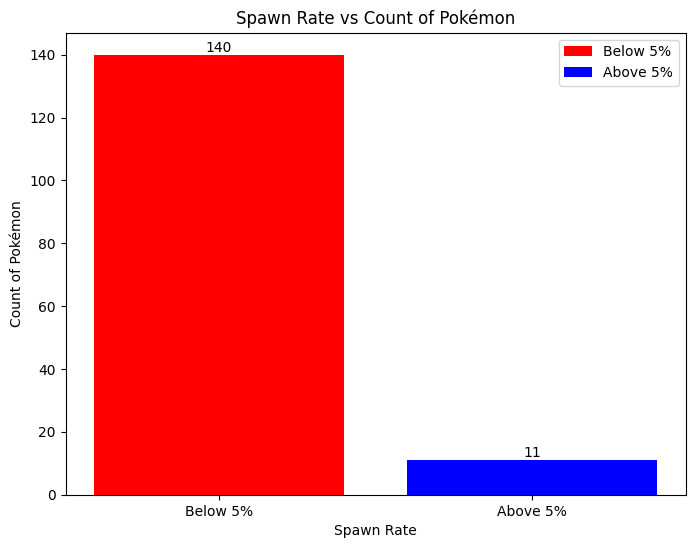

In [52]:
below_5_percent = data[data['Spawn Rate'] < 0.05]
above_5_percent = data[data['Spawn Rate'] >= 0.05]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar('Below 5%', len(below_5_percent), color='red', label='Below 5%')

ax.bar('Above 5%', len(above_5_percent), color='blue', label='Above 5%')

ax.set_xlabel('Spawn Rate')
ax.set_ylabel('Count of Pokémon')
ax.set_title('Spawn Rate vs Count of Pokémon')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

ax.legend()

plt.show()

In [53]:
filtered_df = data[data['Weaknesses'].str.split(",").apply(len) < 4]

pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons whose weaknesses is less than 4:{pokemon_names}")

Pokemons whose weaknesses is less than 4:['Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie', 'Metapod', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran ♀ (Female)', 'Nidorina', 'Nidoran ♂ (Male)', 'Nidorino', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Tentacool', 'Tentacruel', 'Ponyta', 'Rapidash', 'Magnemite', 'Magneton', "Farfetch'd", 'Doduo', 'Dodrio', 'Seel', 'Grimer', 'Muk', 'Shellder', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Koffing', 'Weezing', 'Chansey', 'Kangaskhan', 'Horsea', 'Seadra', 'Goldeen', 'Seaking', 'Staryu', 'Mr.

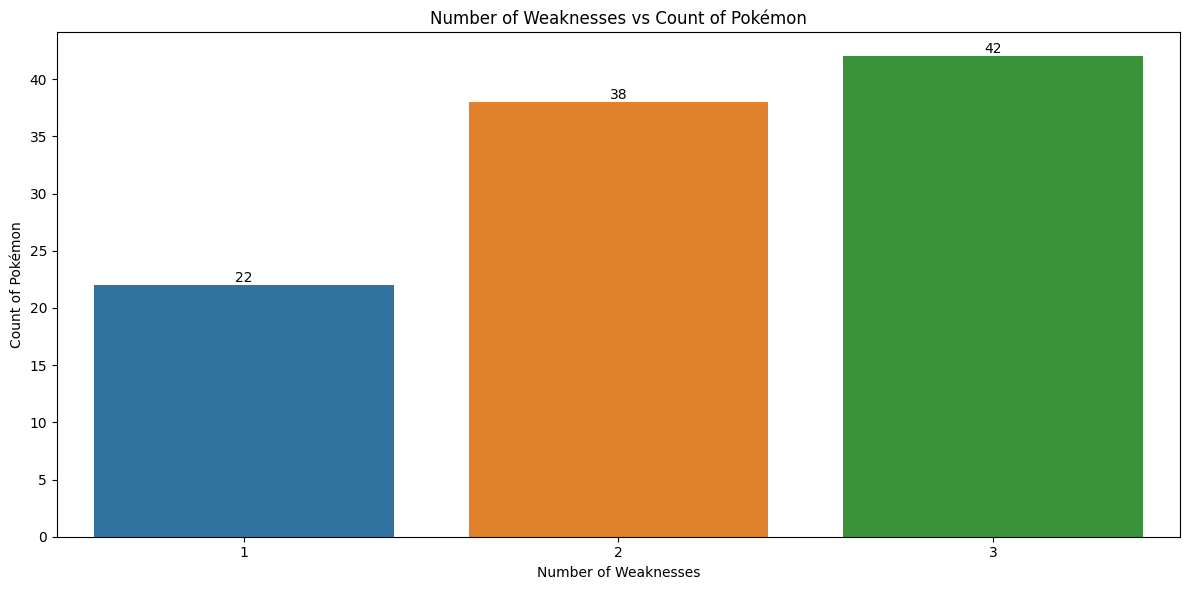

In [54]:
plt.figure(figsize=(12, 6))

weakness_counts = filtered_df['Weaknesses'].str.count(',') + 1

count_data = weakness_counts.value_counts().sort_index()

sns.barplot(x=count_data.index, y=count_data.values)

for i, count in enumerate(count_data.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Number of Weaknesses')

plt.ylabel('Count of Pokémon')

plt.title('Number of Weaknesses vs Count of Pokémon')

plt.tight_layout()

plt.show()

**Insights:**

From graph it is clear that:

● 22 numbers of pokemon who has 1 weakness

● 38 number of pokemon has 2 weaknesses.

● 42 number of pokemons having 3 weaknesses.

Hence a total of 102 numbers of Pokemons are having Weaknesses of less than 4.

In [55]:
filtered_df = data[data['Multipliers'] == '0']

pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons having No Multipliers:{pokemon_names}")

Pokemons having No Multipliers:['Venusaur', 'Charizard', 'Blastoise', 'Butterfree', 'Beedrill', 'Pidgeot', 'Raticate', 'Fearow', 'Arbok', 'Raichu', 'Sandslash', 'Nidoqueen', 'Nidoking', 'Clefable', 'Ninetales', 'Wigglytuff', 'Golbat', 'Vileplume', 'Parasect', 'Venomoth', 'Dugtrio', 'Persian', 'Golduck', 'Primeape', 'Arcanine', 'Poliwrath', 'Alakazam', 'Machamp', 'Victreebel', 'Tentacruel', 'Golem', 'Rapidash', 'Slowbro', 'Magneton', "Farfetch'd", 'Dodrio', 'Dewgong', 'Muk', 'Cloyster', 'Gengar', 'Onix', 'Hypno', 'Kingler', 'Electrode', 'Exeggutor', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Weezing', 'Rhydon', 'Chansey', 'Tangela', 'Kangaskhan', 'Seadra', 'Seaking', 'Starmie', 'Mr. Mime', 'Scyther', 'Jynx', 'Electabuzz', 'Magmar', 'Pinsir', 'Tauros', 'Gyarados', 'Lapras', 'Ditto', 'Vaporeon', 'Jolteon', 'Flareon', 'Porygon', 'Omastar', 'Kabutops', 'Aerodactyl', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres', 'Dragonite', 'Mewtwo', 'Mew']


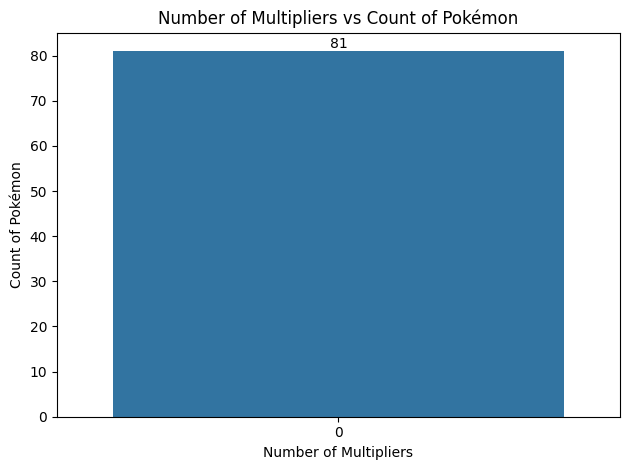

In [56]:
multiplier_counts = filtered_df['Multipliers'].str.count(',') 

count_data = multiplier_counts.value_counts().sort_index()

sns.barplot(x=count_data.index, y=count_data.values)

for i, count in enumerate(count_data.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Number of Multipliers')

plt.ylabel('Count of Pokémon')

plt.title('Number of Multipliers vs Count of Pokémon')

plt.tight_layout()

plt.show()

**Insight:**

● A total of 81 numbers of Pokemons are having no Multipliers.

In [57]:
filtered_df = data[(data['Previous Evolution'].str.count('>') <= 2) | (data['Next Evolution'].str.count('>') <= 2)]

pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons not having more than 2 Evolutions: {pokemon_names}")
print(len(pokemon_names))

Pokemons not having more than 2 Evolutions: ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran ♀ (Female)', 'Nidorina', 'Nidoqueen', 'Nidoran ♂ (Male)', 'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool', 'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash', 'Slowpoke', 'Slowbro', 'Magnemit

**Insight:**

● A total of 126 Pokemons do not have more than 2 Evolutions.

In [58]:
def time_to_seconds(time):
    if isinstance(time, str):
        minutes, seconds = map(int, time.split(':'))
        return minutes * 60 + seconds
    else:
        return 0

In [59]:
filtered_df = data[data['Spawn Time'].apply(time_to_seconds) < 300]

pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons having Spawn Time Less than 300 Seconds: {pokemon_names}")

print(len(pokemon_names))

Pokemons having Spawn Time Less than 300 Seconds: ['Squirtle', 'Blastoise', 'Metapod', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Fearow', 'Arbok', 'Pikachu', 'Sandshrew', 'Nidoran ♀ (Female)', 'Nidoran ♂ (Male)', 'Clefairy', 'Clefable', 'Ninetales', 'Golbat', 'Oddish', 'Paras', 'Parasect', 'Venonat', 'Diglett', 'Meowth', 'Persian', 'Psyduck', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwrath', 'Abra', 'Machop', 'Machamp', 'Bellsprout', 'Tentacool', 'Graveler', 'Ponyta', 'Rapidash', 'Slowbro', 'Magnemite', "Farfetch'd", 'Dodrio', 'Muk', 'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak', 'Hitmonlee', 'Lickitung', 'Rhyhorn', 'Chansey', 'Kangaskhan', 'Horsea', 'Seadra', 'Goldeen', 'Mr. Mime', 'Electabuzz', 'Pinsir', 'Tauros', 'Gyarados', 'Ditto', 'Jolteon', 'Porygon', 'Kabuto', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew']
81


**Insight:**

● A total of 81 Pokemons have Spawn time less than 300 Seconds.

In [60]:
filtered_df = data[data['Type'].str.split(',').apply(len) >2]

pokemon_names = filtered_df['Name'].tolist()
print(f"Pokemons having more than 2 Capabilities: {pokemon_names}")
print(len(pokemon_names))

Pokemons having more than 2 Capabilities: []
0


**Insight:**

● No Pokemon is having more than 2 types of capabilities.

**Question 7 -**
Using the data from Question 4, write code to analyze the data and answer the following questions 

**Note -**

**1.** Draw plots to demonstrate the analysis for the following questions for better visualizations

**2.** Write code comments wherever required for code understanding

**Insights to be drawn -**

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
data= pd.read_csv("Meteorite.csv")

In [63]:
data.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         948 non-null    object 
 1   id           948 non-null    int64  
 2   nametype     948 non-null    object 
 3   recclass     948 non-null    object 
 4   mass         948 non-null    float64
 5   year         948 non-null    object 
 6   reclat       948 non-null    float64
 7   reclong      948 non-null    float64
 8   coordinates  948 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.8+ KB


In [65]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')

earth_meteorites_before_2000 = data[(data['reclat'].notnull()) & (data['year'].dt.year < 2000)]
earth_meteorites_before_2000

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
942,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
943,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
945,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
946,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


In [66]:
data['century'] = (data['year'].dt.year // 100) + 1
meteorites = data[data['year'].dt.year < 2000]
meteorites_per_century = meteorites.groupby('century').size()

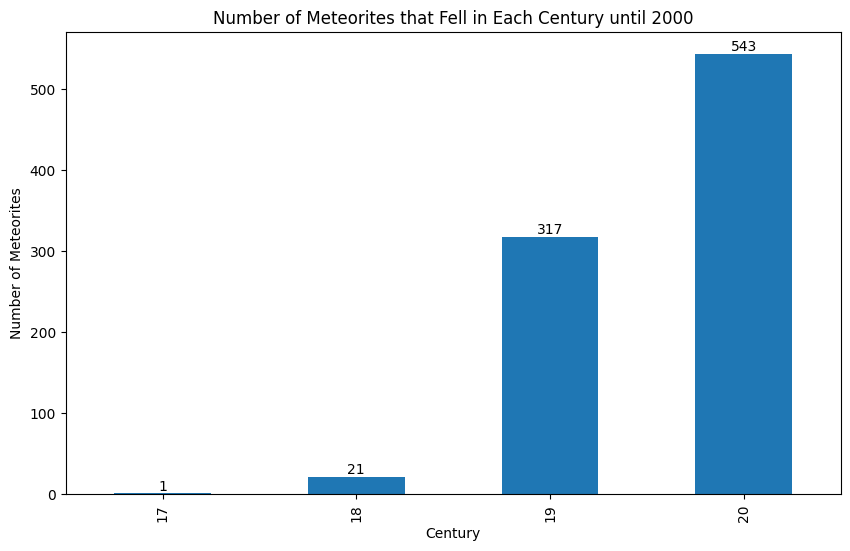

In [67]:
ax=meteorites_per_century.plot(kind='bar', figsize=(10, 6))

for i, v in enumerate(meteorites_per_century):
    ax.text(i, v, str(v), ha='center', va='bottom')
    
plt.xlabel('Century')
plt.ylabel('Number of Meteorites')
plt.title('Number of Meteorites that Fell in Each Century until 2000')
plt.show()

**Insight:**

A total of 882 meteorites fell before the year 2000.

● 1 meteorite fell in the 17th Century.

● 21 meteorites fell during the 18th Century.

● 317 meteorites fell during the 19th Century.

● 543 meteorites fell during the 20th Century.

In [68]:
earth_meteorites_before_1970 = data[(data['year'].dt.year < 1970)][['coordinates']]

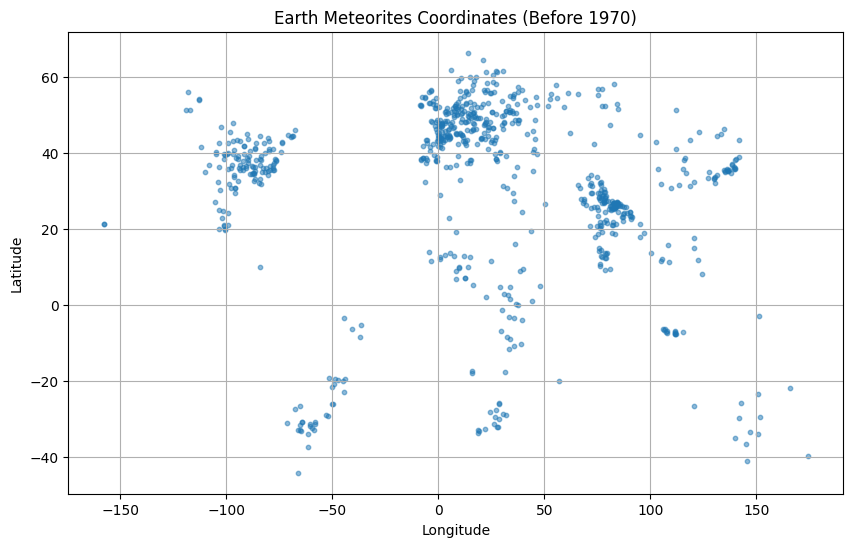

In [70]:
earth_meteorites_before_1970 = meteorites[(meteorites['reclat'].notnull()) & (meteorites['reclong'].notnull()) & (meteorites['year'].dt.year < 1970)]

plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Coordinates (Before 1970)')
plt.grid(True)
plt.show()

**Insight:**

● Most number of meteorites fell where both latitude and longitude are positive as compared to the rest of coordinates.

In [71]:
earth_meteorites_large_mass = data[data['mass'] > 10000][['name', 'mass']]

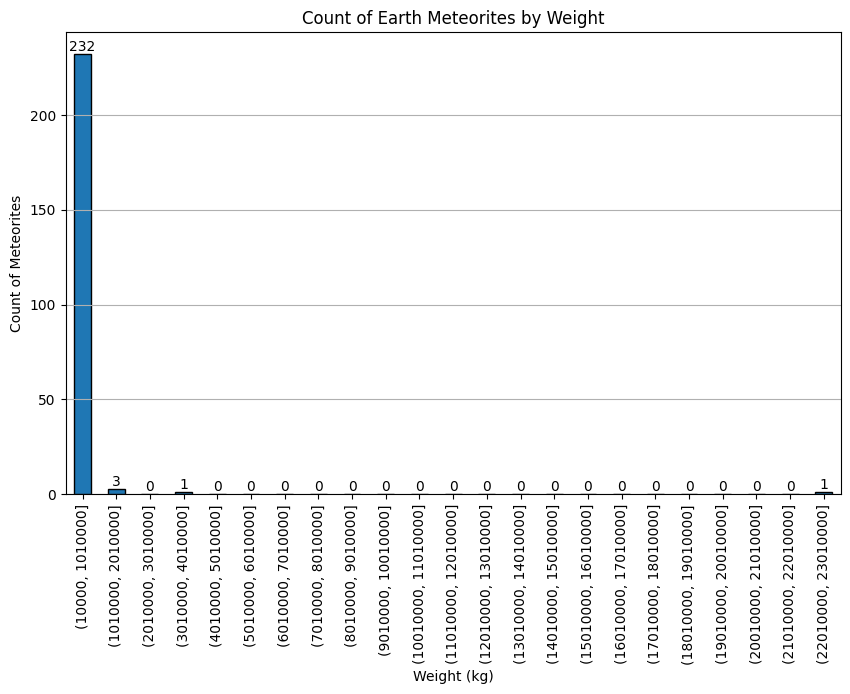

In [72]:
weight_ranges = pd.cut(earth_meteorites_large_mass['mass'], bins=range(10000, int(earth_meteorites_large_mass['mass'].max()) +1000001, 1000000))
meteorite_counts = earth_meteorites_large_mass.groupby(weight_ranges)['name'].count()

plt.figure(figsize=(10, 6))
ax=meteorite_counts.plot(kind='bar', edgecolor='black')

for i, v in enumerate(meteorite_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Weight (kg)')
plt.ylabel('Count of Meteorites')
plt.title('Count of Earth Meteorites by Weight')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

**Insights:**

● A total of 237 Meteorites are having weight above 10000 Kg.

● 232 Meterorites are having weights in the range of 10000 kg to 1010000 Kg

● 5 Meterorites are having weights above the range of 1010000 Kg

**Question 8 -**
Using the data from Question 5, write code the analyze the data and answer the following questions 

**Note -**

**1.** Draw plots to demonstrate the analysis for the following questions and better visualizations

**2.** Write code comments wherever required for code understanding

**Insights to be drawn -**

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
data = pd.read_csv("westworld.csv")
data.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


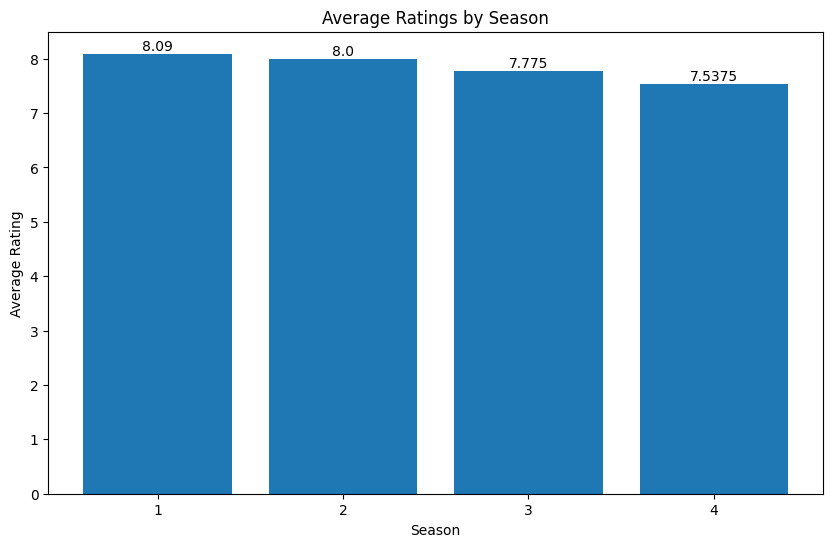

In [75]:
season_ratings = data.groupby('season')['average rating'].mean().reset_index()

seasons = season_ratings['season']
ratings = season_ratings['average rating']

plt.figure(figsize=(10, 6))
bars = plt.bar(seasons, ratings)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Season')
plt.xticks(seasons)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

In [76]:
filtered_episodes = data.groupby(['season', 'number']).filter(lambda x: all(x['average rating'] > 8))

season_episode_names = filtered_episodes.groupby('season')['name'].unique()

for season, episode_names in season_episode_names.items():
    print(f"Season {season} - Episode names:")
    for episode_name in episode_names:
        print(episode_name)
    print()

Season 1 - Episode names:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 - Episode names:
Kiksuya
Vanishing Point
The Passenger



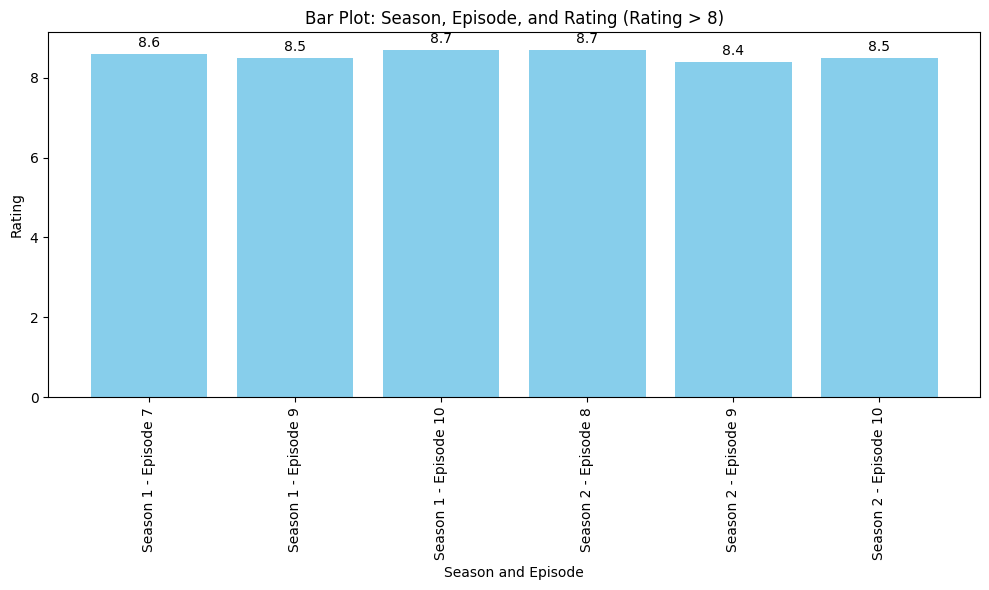

In [77]:
filtered_data = data[data['average rating'] > 8]

grouped_data = filtered_data.groupby(['season', 'number', 'average rating']).size().reset_index(name='count')

grouped_data['episode_name'] = 'Season ' + grouped_data['season'].astype(str) + ' - Episode ' + grouped_data['number'].astype(str)

fig, ax = plt.subplots(figsize=(10, 6))
bar = ax.bar(grouped_data['episode_name'], grouped_data['average rating'], color='skyblue')

ax.set_xlabel('Season and Episode')
ax.set_ylabel('Rating')
ax.set_title('Bar Plot: Season, Episode, and Rating (Rating > 8)')

for rect in bar:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights:**

● There are a total of 6 Episodes that are having the average rating above 8.

● Season-1, Episode-10 & Season-2, Episode 8 are having the highest rating of 8.7

● Season 3 & Season 4 do not have any episodes that are rated above 8.

In [78]:
data['airdate'] = pd.to_datetime(data['airdate'])

filtered_data = data[data['airdate'] < pd.to_datetime('2019-05-01')]

episode_names = filtered_data['name']

for episode_name in episode_names:
    print(episode_name)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


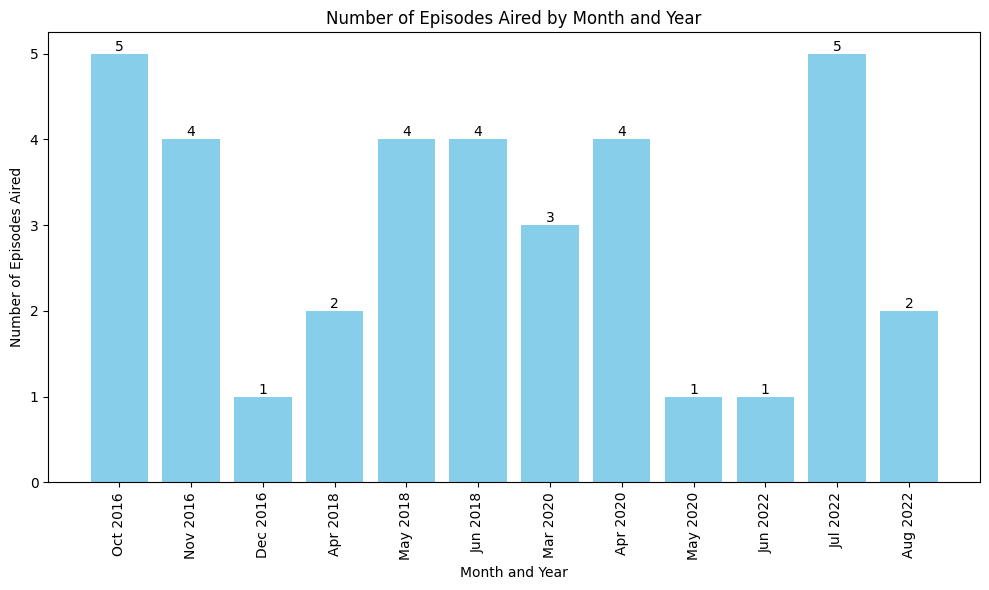

In [79]:
episode_counts = data.groupby(data['airdate'].dt.to_period('M')).size()

x_labels = episode_counts.index.strftime('%b %Y')

plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, episode_counts, color='skyblue')
plt.xlabel('Month and Year')
plt.ylabel('Number of Episodes Aired')
plt.title('Number of Episodes Aired by Month and Year')
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [80]:
highest_ratings = data.groupby('season')['average rating'].idxmax()
highest_episodes = data.loc[highest_ratings, ['season', 'name', 'average rating']]

lowest_ratings = data.groupby('season')['average rating'].idxmin()
lowest_episodes = data.loc[lowest_ratings, ['season', 'name', 'average rating']]

print("Highest Rated Episodes:")
print(highest_episodes[['season', 'name', 'average rating']])

print("\nLowest Rated Episodes:")
print(lowest_episodes[['season', 'name', 'average rating']])

Highest Rated Episodes:
    season                name  average rating
9        1  The Bicameral Mind             8.7
17       2             Kiksuya             8.7
20       3        Parce Domine             8.0
32       4            Zhuangzi             7.8

Lowest Rated Episodes:
    season          name  average rating
2        1     The Stray             7.6
14       2  Akane No Mai             7.6
25       3   Decoherence             7.5
28       4  The Auguries             7.1


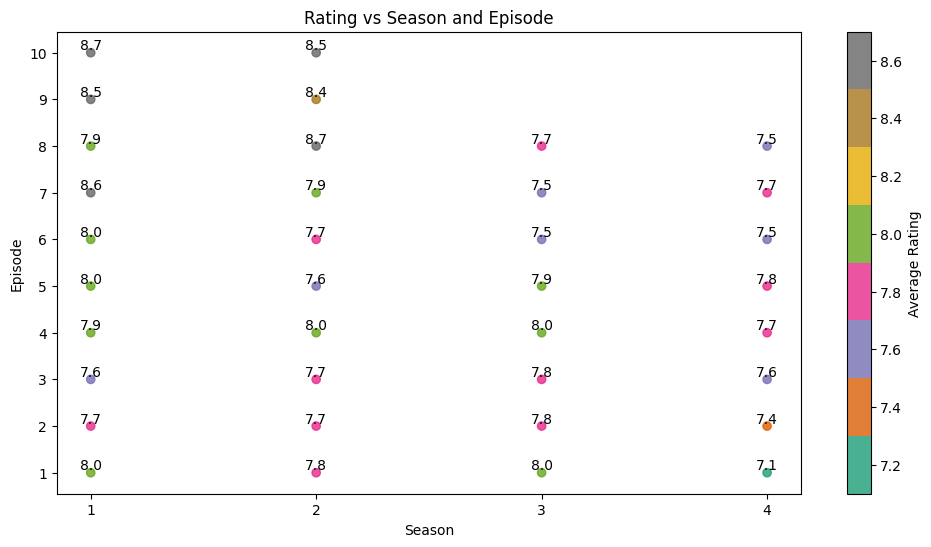

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(data['season'], data['number'], c=data['average rating'], cmap='Dark2', alpha=0.8)
cbar = plt.colorbar()
cbar.set_label('Average Rating')
plt.xlabel('Season')
plt.ylabel('Episode')
plt.title('Rating vs Season and Episode')

for i, rating in enumerate(data['average rating']):
    plt.text(data['season'][i], data['number'][i], str(rating), ha='center', va='bottom')

plt.xticks(range(1, max(data['season']) + 1))

plt.yticks(range(1, max(data['number']) + 1))

plt.show()

**Insights:**

● For Season-1 The highest average rating is 8.7 for episode 10 and minimum is 7.7 for episode 02

● For Season-2 The highest average rating is 8.7 for episode 08 and minimum is 7.6 for episode 05

● For Season-3 The highest average rating is 8.0 for episode 01 & episode 04 and minimum is 7.5 for episode 06 & episode 07

● For Season-4 The highest average rating is 7.8 for episode 05 and minimum is 7.1 for episode 01

In [82]:
most_popular_episodes = data.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax()])
print("Most Popular Episode:")
for season, episode_data in most_popular_episodes.iterrows():
    
    print(f"Season {season} - Episode Name: {episode_data['name']}")
    print(f"Rating: {episode_data['average rating']}")
    print(f"summary: {episode_data['summary']}\n")

Most Popular Episode:
Season 1 - Episode Name: The Bicameral Mind
Rating: 8.7
summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2 - Episode Name: Kiksuya
Rating: 8.7
summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3 - Episode Name: Parce Domine
Rating: 8.0
summary: If you're stuck in a loop, try walking in a straight line.

Season 4 - Episode Name: Zhuangzi
Rating: 7.8
summary: God is bored.



**Question 9 -**
Write a program to read the data from the following link, perform data analysis and answer the following
questions

**Note -**

**1.** Write code comments wherever required for code understanding

**Link -** https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

**Insights to be drawn -**

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
data = pd.read_csv("ev.csv")
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [86]:
data.shape

(130443, 17)

In [87]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [88]:
data.dropna(axis=0, inplace= True)

In [89]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [90]:
data.shape

(129889, 17)

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [91]:
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [92]:
replacement = {'Clean Alternative Fuel Vehicle Eligible':"Eligible",
               'Not eligible due to low battery range' : "Not Eligible",
            'Eligibility unknown as battery range has not been researched' : 'Unknown'
               }

data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].replace(replacement)

In [93]:
filtered_data = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not Eligible'][['Make', 'Model', 'Electric Vehicle Type']]
filtered_data

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
15,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
130377,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130385,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV)
130390,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)
130407,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)


In [94]:
filtered_data[filtered_data["Electric Vehicle Type"]== "Battery Electric Vehicle (BEV)"].count()

Make                     9
Model                    9
Electric Vehicle Type    9
dtype: int64

In [95]:
filtered_data[filtered_data["Electric Vehicle Type"]== "Plug-in Hybrid Electric Vehicle (PHEV)"].count()

Make                     16370
Model                    16370
Electric Vehicle Type    16370
dtype: int64

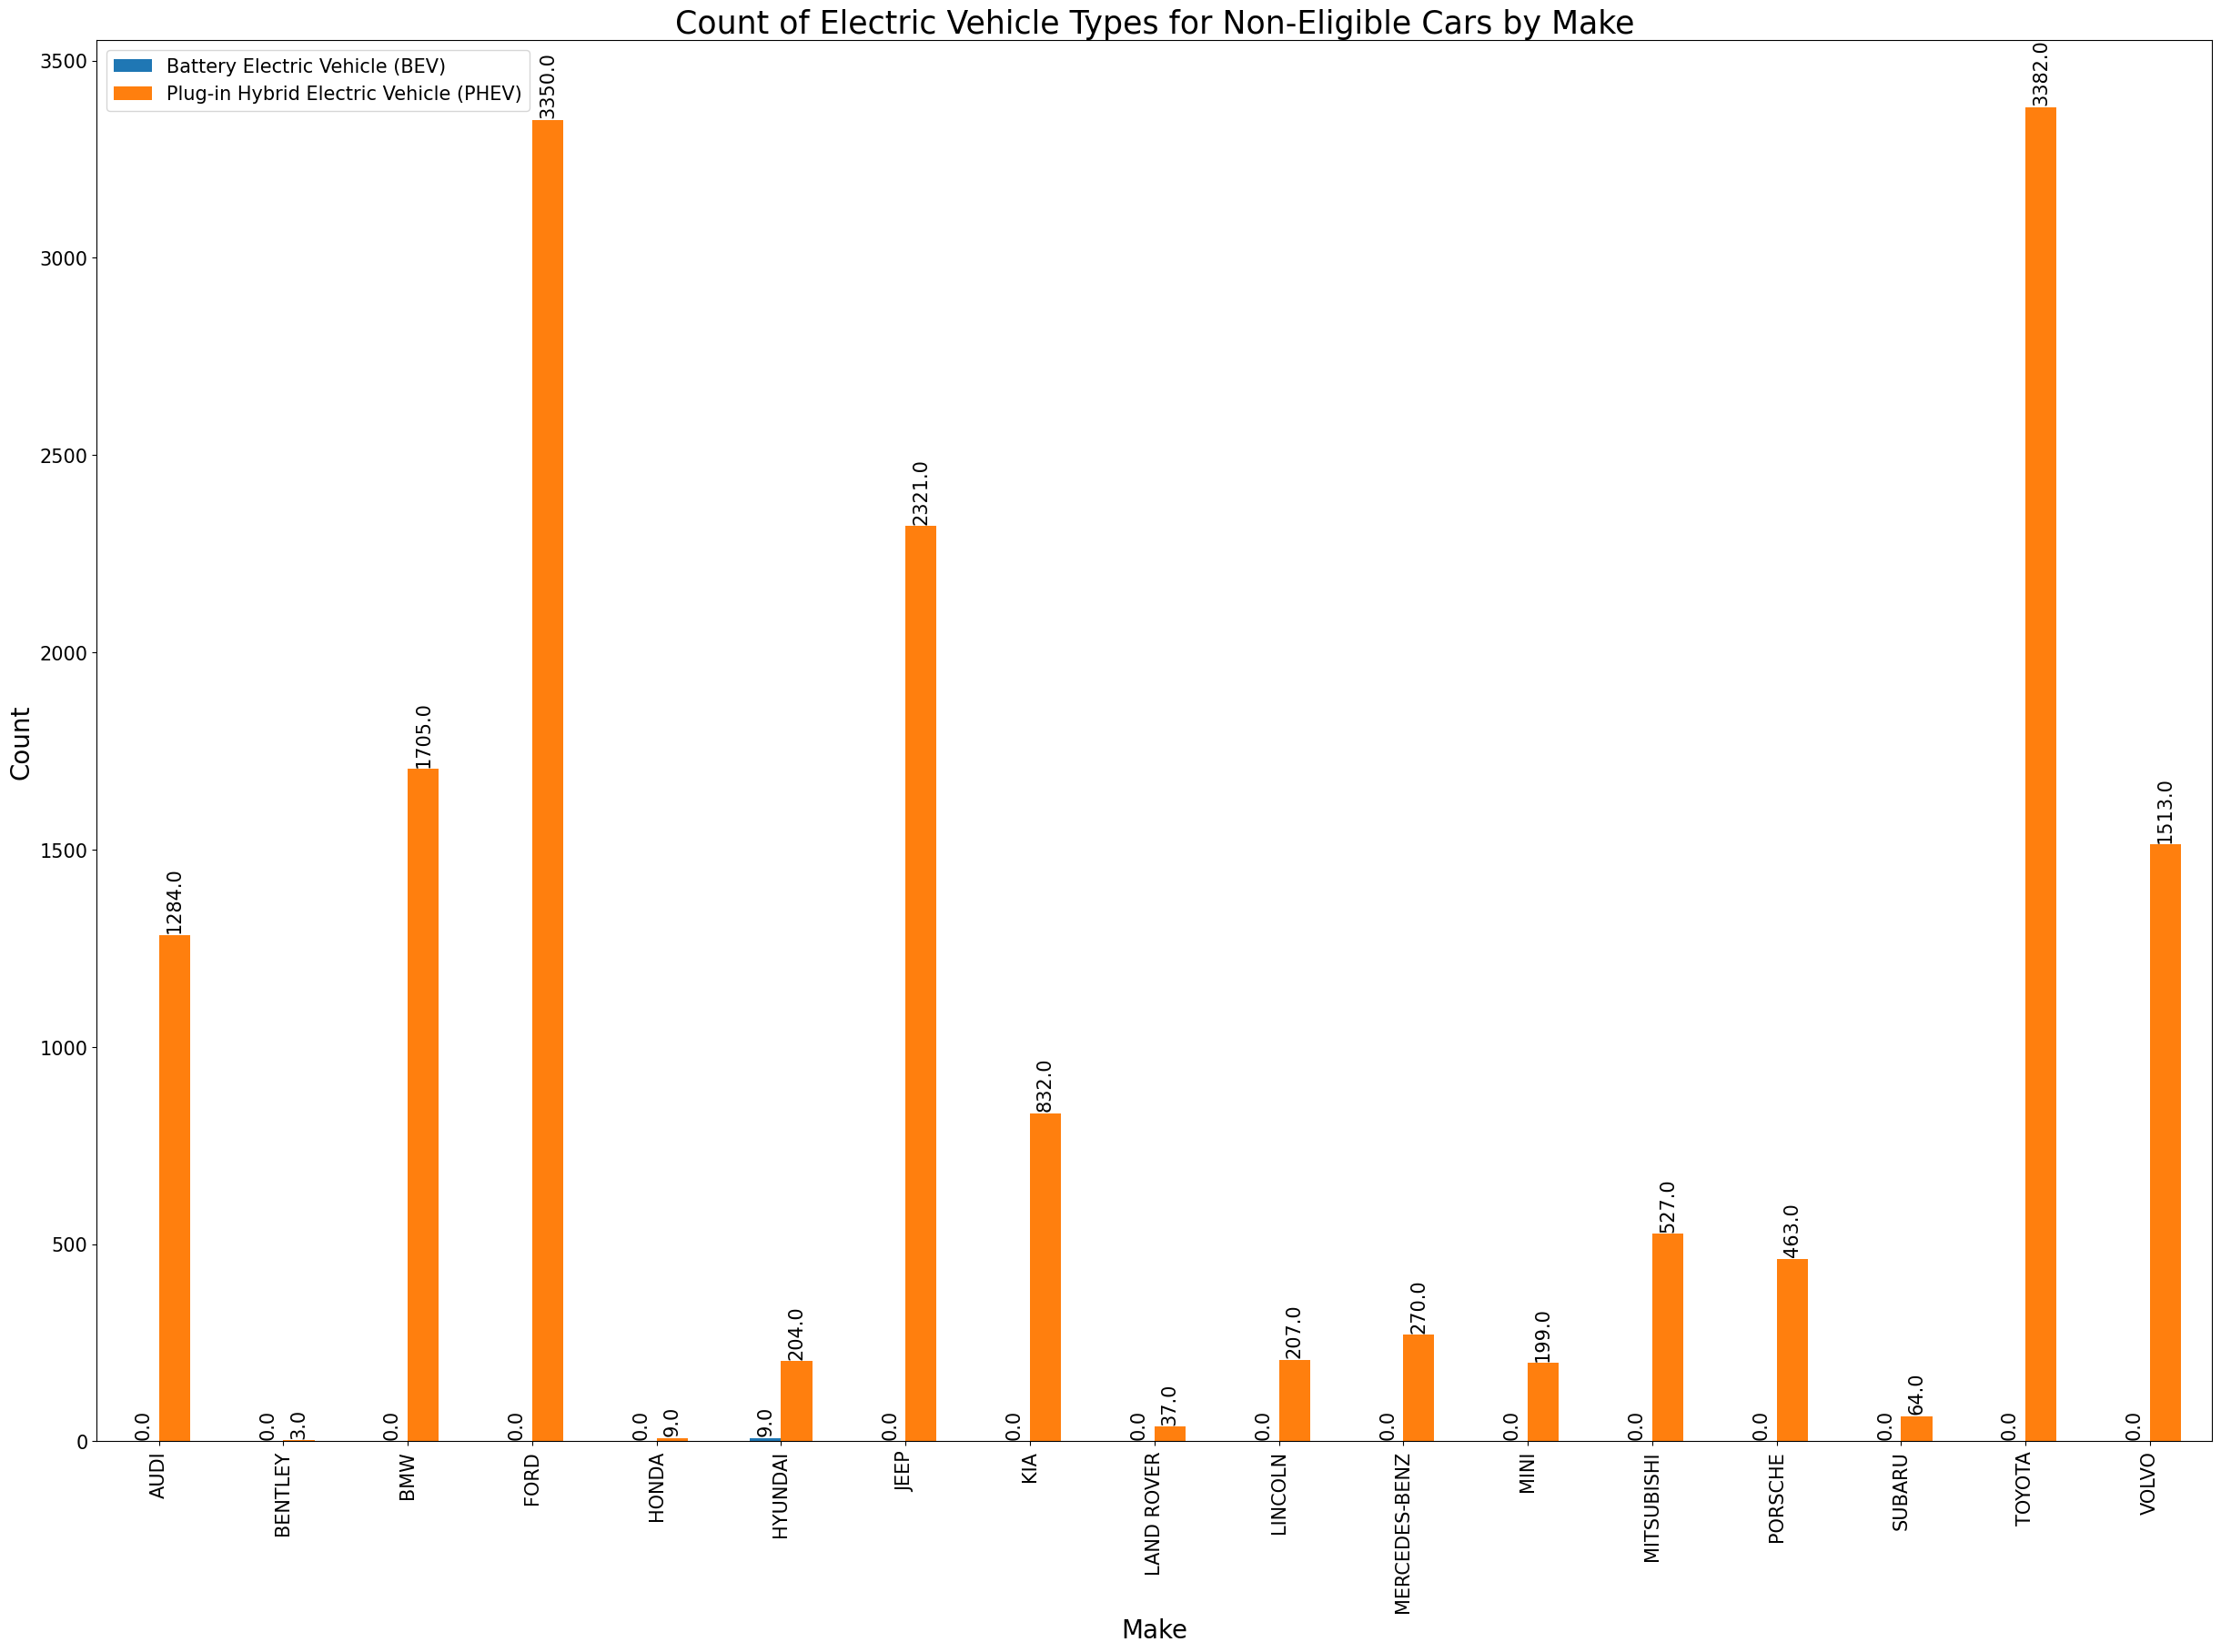

In [96]:
filtered_data = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not Eligible'][['Make', 'Model', 'Electric Vehicle Type']]

counts = filtered_data.groupby(['Make', 'Electric Vehicle Type']).size().unstack()
# Create the figure and axes
fig, ax = plt.subplots(figsize=(30, 20))  
# Use the axes to plot the data
counts.plot(kind='bar', stacked=False, ax=ax)  

plt.xlabel('Make',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Count of Electric Vehicle Types for Non-Eligible Cars by Make',fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.legend(loc='upper left',fontsize=15)

# Add data labels
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        x = rect.get_x() + rect.get_width() / 2
        y = height + 5  # Adjust the offset for label positioning
        ax.text(x, y, height, ha='center', va='bottom', rotation=90, fontsize=15)

plt.show()

Insight:

Toyota is having the most number of Plugin Hybrid Electric Vehicle(3382) that are not eligible for Clean Alternative Fuel Vehicle(CAFV).
Hyundai is having the most number of Battery Electric Vehicle (9) that are not eligible for Clean Alternative Fuel Vehicle(CAFV).
● Get all TESLA cars with the model year, and model type made in Bothell City.

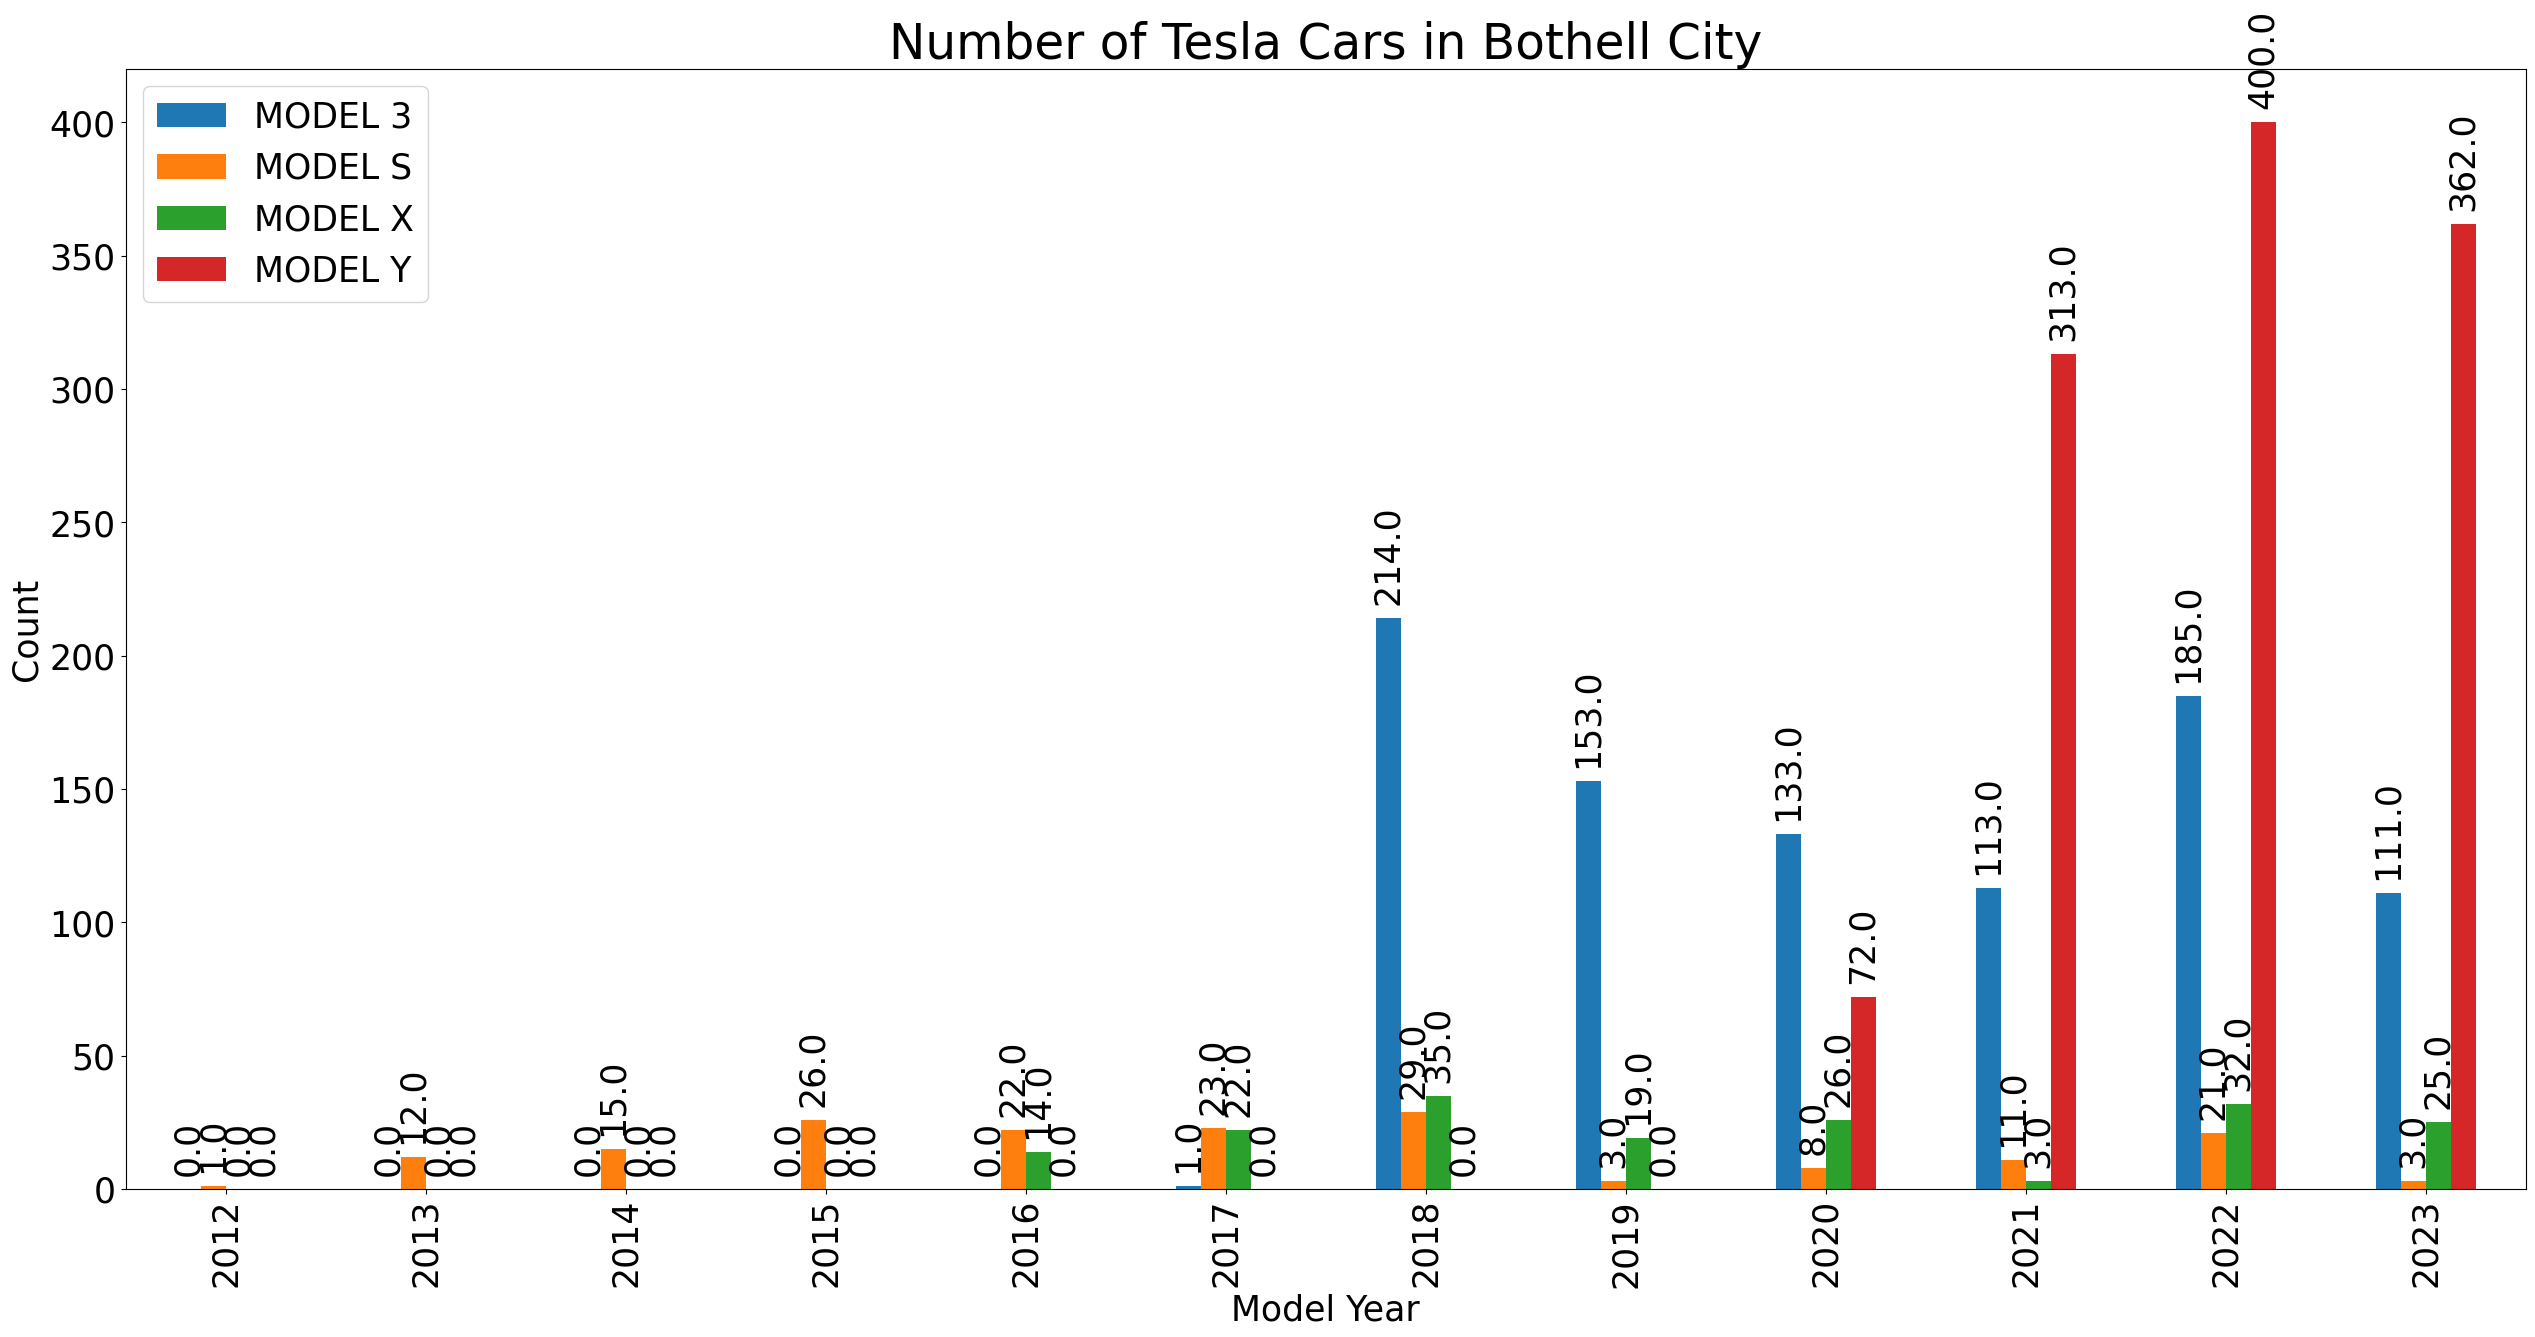

In [97]:
tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')]
tesla_cars_bothell_filtered = tesla_cars_bothell[['Model Year', 'Model']]

# Grouping by Model Year and Model and getting the counts
counts = tesla_cars_bothell_filtered.groupby(['Model Year', 'Model']).size().unstack()

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(30, 16))

# Plotting the bar graph
counts.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('Model Year',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Number of Tesla Cars in Bothell City',fontsize=35)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(rotation=0,fontsize=25)
plt.legend(loc='upper left',fontsize=25)

# Add data labels
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        x = rect.get_x() + rect.get_width() / 2
        y = height + 5  # Adjust the offset for label positioning
        ax.text(x, y, height, ha='center', va='bottom', rotation=90, fontsize=25)

# Adjust the margins
plt.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)

plt.show()

Insight:

Most of Tesla car models made in Bothell city during 2012 to 20223
In the year 2022 maximum numbers of Tesla Model Y cars (400) were made.
In the year 2018 maximum number of Tesla Model X (35), Model S(29), Model 3(214) were made.
● Get all the cars that have an electric range of more than 100, and were made after 2015

In [98]:
electric_cars = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
electric_cars

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


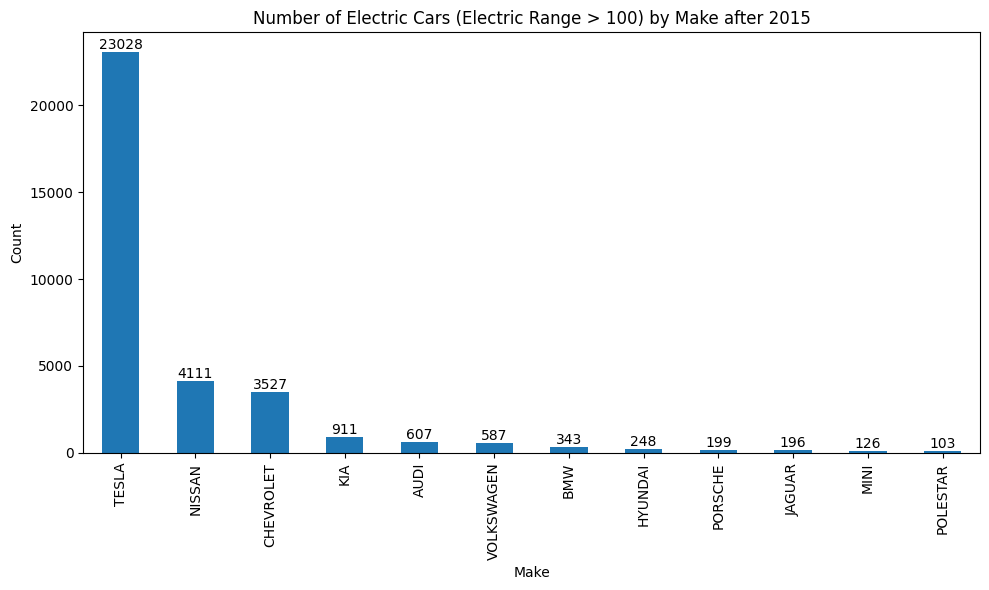

In [99]:
counts = electric_cars['Make'].value_counts()
plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Number of Electric Cars (Electric Range > 100) by Make after 2015')
plt.xticks(rotation=90)
plt.tight_layout()
# Add data labels
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Insight:

From the above graph it is clear that Tesla has most number of cars made after 2015 that are having range more than 100 & Polestar has the least number of cars.
● Draw plots to show the distribution between city and electric vehicle type

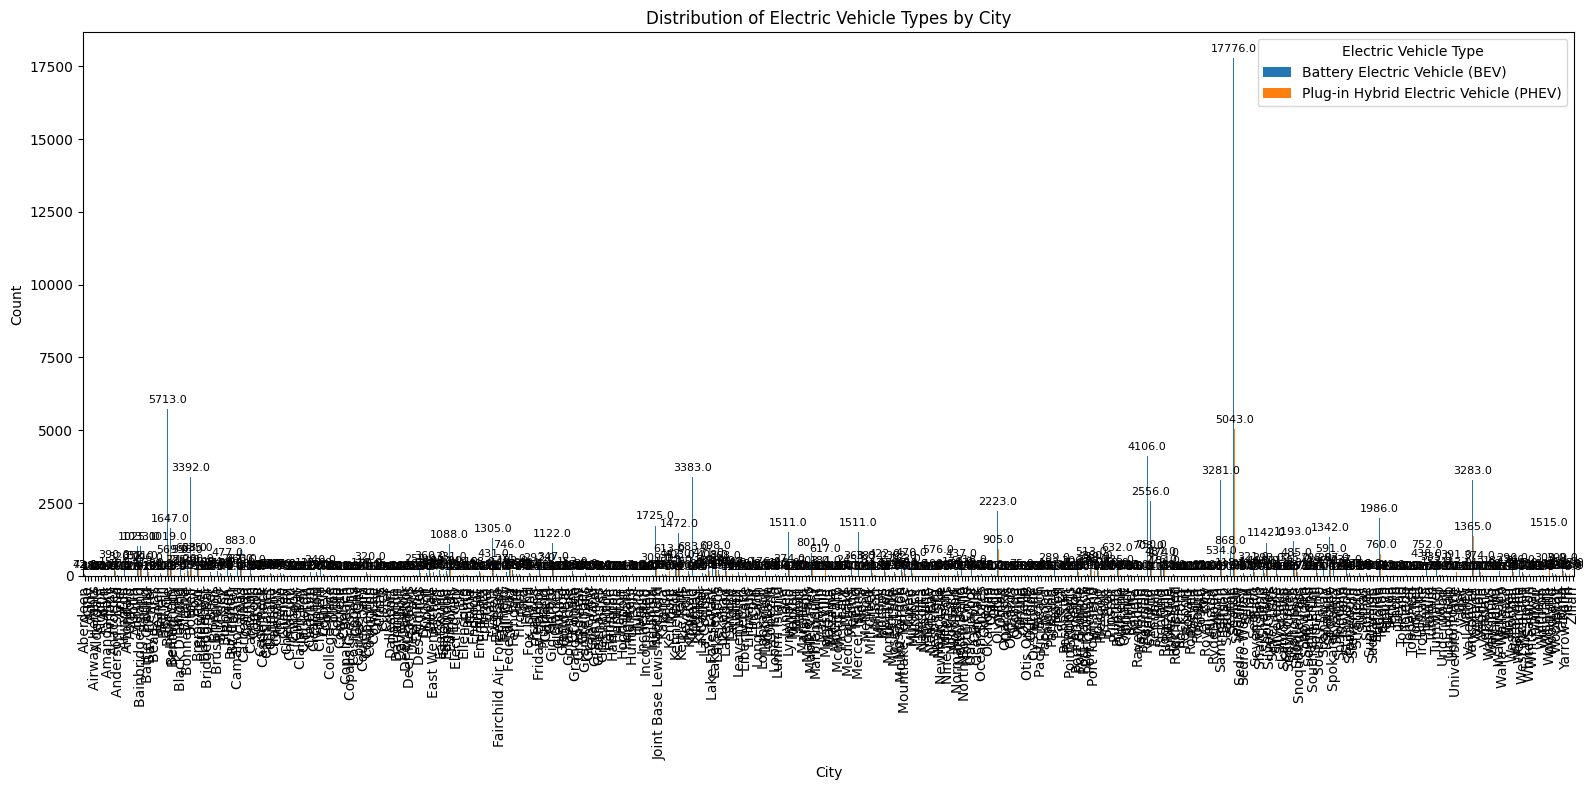

In [100]:
city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Bar plot - distribution of electric vehicle types by city
fig, ax = plt.subplots(figsize=(16, 8)) 
city_ev_type_counts.plot(kind='bar', stacked=False, ax=ax)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
# Add data labels
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)
plt.show()